### Non Linear Regression with one variable (or) Polynomial Regression

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gdp = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv')

In [5]:
gdp.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [6]:
gdp.shape

(55, 2)

In [7]:
gdp.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


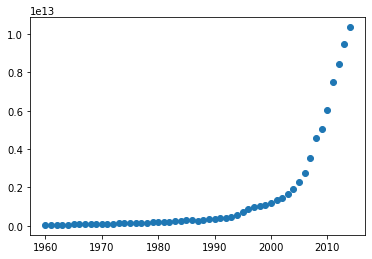

In [8]:
plt.scatter(gdp['Year'],gdp['Value'])

- Convert data to Poly Nomial Features
- Linear Regression

 - $$ Y = m_0 * x^0 + M_1 * x^1 + M_2 * x^2+..........+M_n * x^n
 - p1 = x^1
 - p2 = x^2
 - p3 = x^3

 - $$ Y = M_1 * p_1 + M_2 * p_2 + M_3 * p_3 + C

In [9]:
x=gdp['Year'].values.reshape(-1,1)
y=gdp['Value']

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree = 3)

In [17]:
from sklearn.linear_model import LinearRegression

In [13]:
x_poly=poly.fit_transform(x)
x_poly

array([[1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e+06, 7.56416335e+09],
       [1.00000000e+00, 1.96400000e+03, 3.85729600e+06, 7.57572934e+09],
       [1.00000000e+00, 1.96500000e+03, 3.86122500e+06, 7.58730712e+09],
       [1.00000000e+00, 1.96600000e+03, 3.86515600e+06, 7.59889670e+09],
       [1.00000000e+00, 1.96700000e+03, 3.86908900e+06, 7.61049806e+09],
       [1.00000000e+00, 1.96800000e+03, 3.87302400e+06, 7.62211123e+09],
       [1.00000000e+00, 1.96900000e+03, 3.87696100e+06, 7.63373621e+09],
       [1.00000000e+00, 1.97000000e+03, 3.88090000e+06, 7.64537300e+09],
       [1.00000000e+00, 1.97100000e+03, 3.88484100e+06, 7.65702161e+09],
       [1.00000000e+00, 1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.00000000e+00, 1.97300000e+03, 3.89272900e

In [18]:
model1=LinearRegression()

In [19]:
model1.fit(x_poly, y)

LinearRegression()

In [21]:
model1.predict(poly.fit_transform([[2015]]))

array([1.04551319e+13])

In [22]:
pred = model1.predict(x_poly)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
r2_score(y, pred)

0.9645101039190398

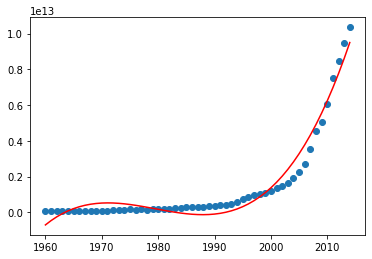

In [27]:
plt.scatter(gdp['Year'],gdp['Value'])
plt.plot(gdp['Year'],pred,c='r')

In [28]:
model1.coef_

array([ 0.00000000e+00,  3.24332951e+15, -1.63848615e+12,  2.75908680e+08])

In [30]:
acc=[]
for i in range(2,15):
    poly=PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    model1 = LinearRegression()
    model1.fit(x_poly,y)
    model1.predict(poly.fit_transform([[2015]]))
    pred = model1.predict(x_poly)
    acc.append(r2_score(y,pred))

In [31]:
acc

[0.842444347417096,
 0.9645101039190398,
 0.9651202302149839,
 0.9657218086590584,
 0.9663149021232567,
 0.9668995728709138,
 0.9674758835399555,
 0.968043897114671,
 0.9686036769353393,
 0.9691552866501768,
 0.9696987902283306,
 0.9702342519181215,
 0.9707617362695212]